<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [2]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
data = pd.read_csv('./train.csv')

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [47]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1530,72,65.55,4807.45,Male,0,No,No,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
2708,4,46.00,181.60,Female,1,Yes,Yes,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,1
4149,2,83.80,163.70,Female,1,No,No,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),0
1288,5,20.45,106.90,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
2479,11,84.80,888.75,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Electronic check,0


In [7]:
print(data.isna().sum(axis=0))

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64


Метод `pd.isna` не выявил никаких пропусков в нашем датасете. Но не будем столь оптимистичны

In [8]:
for cat_col in cat_cols:
    print(data[cat_col].unique())

['Male' 'Female']
[0 1]
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes' 'No phone service']
['No' 'Fiber optic' 'DSL']
['No internet service' 'No' 'Yes']
['No internet service' 'No' 'Yes']
['No internet service' 'No' 'Yes']
['No internet service' 'Yes' 'No']
['No internet service' 'No' 'Yes']
['No internet service' 'No' 'Yes']
['One year' 'Two year' 'Month-to-month']
['No' 'Yes']
['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'Bank transfer (automatic)']


In [48]:
data[num_cols].describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.486161
std,24.550326,30.176464,2269.049195
min,0.000000,18.250000,0.000000
25%,9.000000,35.462500,395.725000
50%,29.000000,70.400000,1405.650000
75%,55.000000,90.050000,3795.212500
max,72.000000,118.750000,8684.800000


Странно, но при вызове метода `pd.describe` не отобразилась информация о столбце `TotalSpent`. Вероятно, pandas-у не удалось сконвертировать данные в числовой тип. Давайте посмотрим, есть ли в данном столбце пропуски

In [10]:
data['TotalSpent'] = pd.to_numeric(data.TotalSpent, errors='coerce')
print(data['TotalSpent'].isna().sum())

9


Как мы видим, в данный столбец "затесались" нечисловые значения. Давайте избавимся от них и затем приведём числовые данные к типу `float`

In [11]:
nan_indices = data['TotalSpent'].isna()
data.loc[nan_indices, 'TotalSpent'] = 0
data[num_cols].astype('float')
data[num_cols].dtypes

ClientPeriod         int64
MonthlySpending    float64
TotalSpent         float64
dtype: object

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

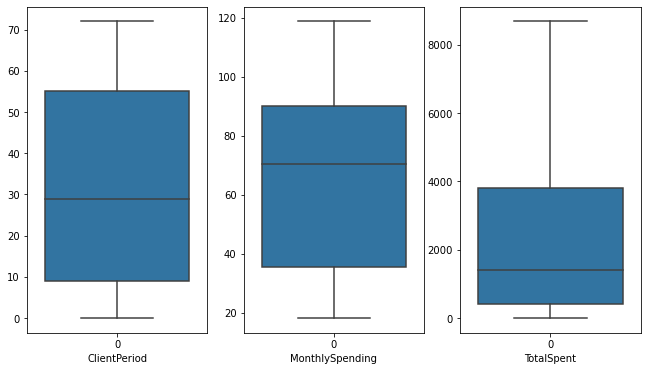

In [12]:
# Распределение числовых признаков
fig, axes = plt.subplots(1, 3, figsize=(11, 6))

sns.boxplot(data=data.ClientPeriod, ax=axes[0])
axes[0].set_xlabel('ClientPeriod')

sns.boxplot(data=data.MonthlySpending, ax=axes[1])
axes[1].set_xlabel('MonthlySpending')

sns.boxplot(data=data.TotalSpent, ax=axes[2])
axes[2].set_xlabel('TotalSpent')

plt.show()

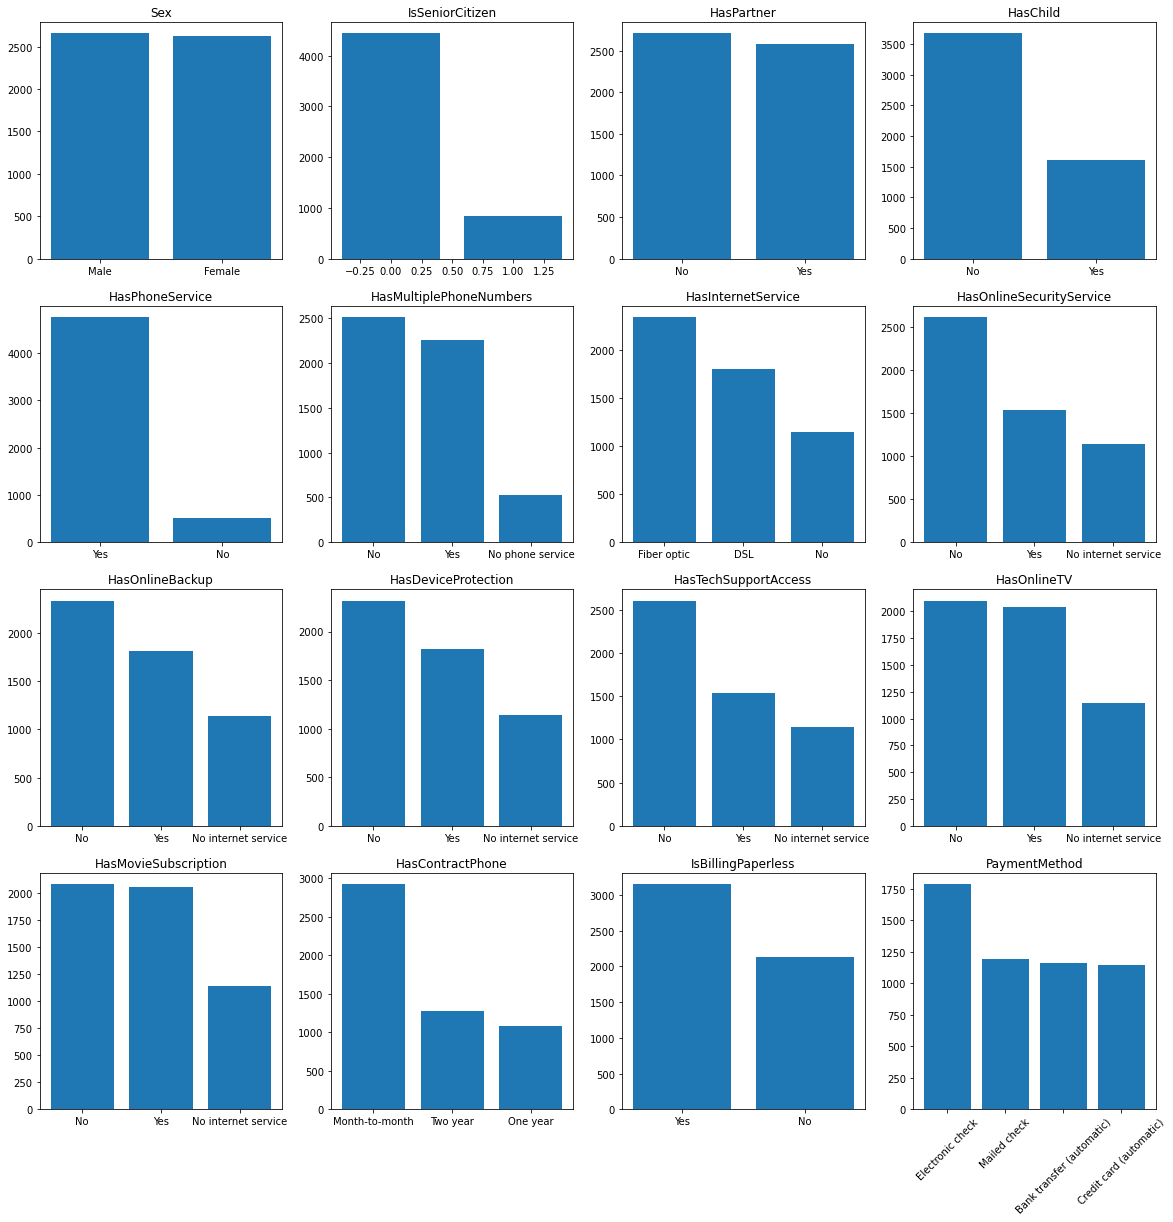

In [13]:
# Распределение категориальных признаков
LIMIT_FOR_TICKS_ROTATION = 3
ROTATION_DEGREE = 45

fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for i in range(len(cat_cols)):
    axes_data = data[cat_cols[i]].value_counts()
    axes[i//4, i%4].bar(axes_data.index, axes_data.values)
    axes[i//4, i%4].set_title(cat_cols[i])
    
    if (axes_data.index.size > LIMIT_FOR_TICKS_ROTATION):
        axes[i//4, i%4].tick_params(axis='x', rotation=ROTATION_DEGREE)

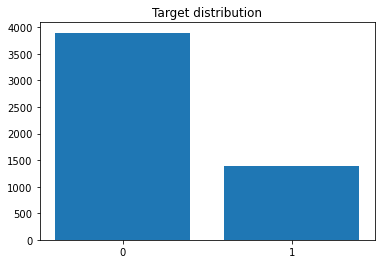

In [14]:
# Распределение целевой переменной
target_data = data[target_col].value_counts()

plt.bar(target_data.index, target_data.values)
plt.title('Target distribution')
plt.xticks([0, 1])
plt.show()

В данном случае целевые классы несбалансированны

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [15]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [1]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, \
                                    LabelEncoder, OneHotEncoder, \
                                    FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

In [17]:
train_data, test_data, \
    train_labels, test_labels = train_test_split(data[feature_cols], 
                                                data[target_col], 
                                                test_size=0.3, 
                                                random_state=0, 
                                                stratify=data[target_col])

In [18]:
classifier = LogisticRegression(class_weight='balanced', 
                                solver='liblinear',
                                random_state=0)

num_indices = np.array([(col in num_cols) for col in data.columns[:-1]], dtype = bool)
cat_indices = np.array([(col in cat_cols) for col in data.columns[:-1]], dtype = bool)

In [19]:
estimator = Pipeline(steps = [       
    ('feature_processing', FeatureUnion(transformer_list = [                            
            #numeric
            ('num_variables_processing', Pipeline(steps = [
                ('selecting', FunctionTransformer(lambda data: data.iloc[:, num_indices])),
                ('scaling', StandardScaler())            
                        ])),
        
            #categorical
            ('cat_variables_processing', Pipeline(steps = [
                ('selecting', FunctionTransformer(lambda data: data.iloc[:, cat_indices])),
                ('hot_encoding', OneHotEncoder(handle_unknown='ignore'))            
                        ])),
        ])),
    ('model_fitting', classifier)
    ]
)

In [20]:
params_grid = {
    'model_fitting__C': [0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 50, 100]
}

grid_cv = GridSearchCV(estimator, params_grid, scoring='roc_auc', cv=6)

In [21]:
grid_cv.fit(train_data, train_labels)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('feature_processing',
                                        FeatureUnion(transformer_list=[('num_variables_processing',
                                                                        Pipeline(steps=[('selecting',
                                                                                         FunctionTransformer(func=<function <lambda> at 0x7fb7c05a8f70>)),
                                                                                        ('scaling',
                                                                                         StandardScaler())])),
                                                                       ('cat_variables_processing',
                                                                        Pipeline(steps=[('selecting',
                                                                                         FunctionTransformer(func=<function <lambda> at 0x7fb7c05a8e5

In [50]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.8425485526658901
{'model_fitting__C': 10}


In [51]:
test_predictions = grid_cv.predict_proba(test_data)
roc_auc_score(test_labels, test_predictions[:, 1])

0.8441767068273092

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

`C`: 10

`roc_auc`: 0.8442

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [24]:
from catboost import CatBoostClassifier

In [26]:
# Классификатор из catboost с дефолтными параметрами
gb_classifier = CatBoostClassifier(cat_features=cat_cols, 
                                   n_estimators=300, 
                                   learning_rate=0.03, 
                                   eval_metric='AUC:hints=skip_train~false')
gb_classifier.fit(train_data, train_labels, 
                    logging_level='Silent')

gb_test_preds = gb_classifier.predict_proba(test_data)[:, 1]
gb_roc_auc = roc_auc_score(test_labels, gb_test_preds)
print(round(gb_roc_auc, 4))

0.8481


In [57]:
gb_classifier = CatBoostClassifier(cat_features=cat_cols, 
                                    eval_metric='AUC:hints=skip_train~false', 
                                    logging_level='Silent')

params_grid = {
    'learning_rate': [0.01, 0.02, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2, 0.3, 0.5], 
    'n_estimators': [100, 200, 300, 500, 750, 1000, 1250, 1500, 1750]
}

gb_classifier.grid_search(params_grid, train_data, train_labels, \
                            cv=5, verbose=False)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

{'params': {'iterations': 300, 'learning_rate': 0.03},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               

In [77]:
gb_test_preds = gb_classifier.predict_proba(test_data)[:, 1]
gb_roc_auc = roc_auc_score(test_labels, gb_test_preds)
print(round(gb_roc_auc, 4))
print(gb_classifier.get_params()['learning_rate'])
print(gb_classifier.get_params()['iterations'])

0.8481
0.03
300


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

`learning rate`: 0.03

`n_estimators`: 300

`roc_auc`: 0.8481

# Предсказания

In [44]:
best_model = gb_classifier

In [57]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

X_test['TotalSpent'] = pd.to_numeric(X_test.TotalSpent, errors='coerce')
nan_indices = X_test['TotalSpent'].isna()
X_test.loc[nan_indices, 'TotalSpent'] = 0
X_test[num_cols].astype('float')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]# / best_model.predict(X_test)
submission.set_index('Id', inplace=True)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.